# Drinking Habits and Integrity of College Students
A student survey was conducted at a major university. Data were collected from a random sample of 236 undergraduate students, and the information that was collected included physical characteristics (such as height and handedness), study habits, academic performance and attitudes, and social behaviors. In this exercise we will focus on exploring relationships between some of those variables. Note that (a) these are **real** data, and (b) the symbol * in the worksheet means that this observation is not available (this is known as a 'missing value').

In [1]:
%matplotlib inline

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_excel('drinking.xls')
data.head()

,Gender,Alcohol,Height,Cheat
0,Female,15,64.0,0
1,Male,14,69.0,0
2,Female,*,66.0,0
3,Female,10,63.0,0
4,Male,30,72.0,0


In [12]:
# Get shape of data
data.shape

(236, 4)

In [13]:
# Describe the data
data.describe()

,Height,Cheat
count,236.000000,236.000000
mean,66.765890,0.084746
std,3.814936,0.279095
min,59.500000,0.000000
25%,64.000000,0.000000
50%,67.000000,0.000000
75%,69.125000,0.000000
max,76.500000,1.000000


In [15]:
# Get info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
Gender     236 non-null object
Alcohol    236 non-null object
Height     236 non-null float64
Cheat      236 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.5+ KB


# Exercise
### 1. Out of the first ten students in the datafile, how many drink 15 or more alcoholic beverages per week?

In [16]:
data.head(10)

,Gender,Alcohol,Height,Cheat
0,Female,15,64.0,0
1,Male,14,69.0,0
2,Female,*,66.0,0
3,Female,10,63.0,0
4,Male,30,72.0,0
5,Female,20,67.0,0
6,Male,15,69.0,0
7,Male,15,74.0,0
8,Male,0,72.0,0
9,Female,0,63.0,0


In [19]:
# Count number of rows with Alcohol as *
data[data.Alcohol == '*'].count()

Gender     30
Alcohol    30
Height     30
Cheat      30
dtype: int64

In [26]:
# Let's get the first 10 rows and exclude *
data1 = data.head(10)[data.Alcohol != '*']
# Convert Alcohol values to flat
data1['Alcohol'] = data1['Alcohol'].astype(float)
data1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Gender,Alcohol,Height,Cheat
0,Female,15.0,64.0,0
1,Male,14.0,69.0,0
3,Female,10.0,63.0,0
4,Male,30.0,72.0,0
5,Female,20.0,67.0,0
6,Male,15.0,69.0,0
7,Male,15.0,74.0,0
8,Male,0.0,72.0,0
9,Female,0.0,63.0,0


In [30]:
# Get count of students that drink 15 or more
data1[data1['Alcohol'] >= 15].shape[0]

5

### 2. Out of the first ten students in the datafile, how many alcoholic beverages per week does the tallest student drink? 

In [37]:
data.head(10)[data.Height == data.head(10).Height.max()]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Gender,Alcohol,Height,Cheat
7,Male,15,74.0,0


### 3. What is the height of the first male in the datafile who would report on cheating? 

In [51]:
data[(data.Cheat == 1) & (data.Gender == 'Male')].head(1)

,Gender,Alcohol,Height,Cheat
46,Male,5,64.0,1


### Q1. What are the drinking habits of students at this university? In particular, what is the typical number of drinks a student has during a week? Do the data suggest that drinking is a problem in this university?

In [72]:
data2 = data[data['Alcohol'] != '*']['Alcohol'].astype(float)

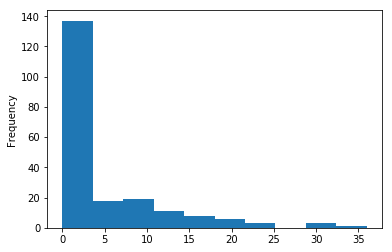

In [74]:
data2.plot(kind='hist')

In [82]:
print(data2.to_frame().describe())
print('median\t', data2.median())
print('Q1\t', data2.quantile(.25))
print('Q3\t', data2.quantile(.75))

          Alcohol
count  206.000000
mean     4.538835
std      6.915938
min      0.000000
25%      0.000000
50%      1.000000
75%      7.000000
max     36.000000
median	 1.0
Q1	 0.0
Q3	 7.0


Typically, students drink about one drink a week, with 50% of the students drinking one or fewer and 50% drinking one or more. A closer look at the data reveals that drinking is a problem in this university. More specifically, Q3 = 7 which means that 25% of the students consume more than 7 alcoholic beverages a week, which is quite a serious problem.

 - Most of the students had fewer drinks/week than we thought, but many drank far more than we predicted.

 - Since the results suggest that drinking is a problem at this university and it may be affecting students' health, safety, or academic performance, the administration should consider what actions need to be taken to solve the problem.

### Q2. One of the statistics professors at this university uses the honor system when giving exams. If there were cheating going on during her exams, would the professor be likely to know about it?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f928ec099b0>], dtype=object)

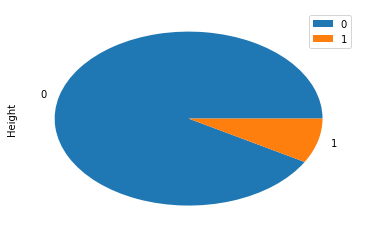

In [88]:
data.groupby('Cheat').sum().plot(kind='pie',subplots=True)

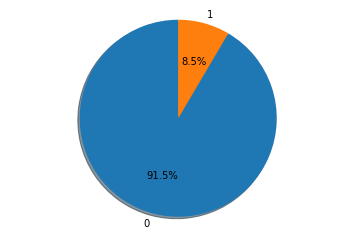

In [91]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data['Cheat'].value_counts().to_frame().reset_index()['index']
sizes = data['Cheat'].value_counts().to_frame().reset_index()['Cheat']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


91.5% answered that they won't report on cheating compared to 8.5%

We considered two aspects of student life. The social aspect of drinking and the more academic aspect of cheating. We are concerned about some students drinking too much and that most students would not report cheating if they saw it.